no longer an issue

In [34]:
%matplotlib inline
import weak_sauce as ws
import weak_sauce.data_tools
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

from weak_sauce.movers import UniformGaussianMover
from weak_sauce.grid import MoveableGrid
from weak_sauce.sources import Source
from weak_sauce.movers import UniformIlluminationMover, FixedIlluminationMover
from weak_sauce.fit_flat import FlatFitter

full_amp_img = np.load('../data/lsst_ultraflat_75ke_amp3.npy')
fitted = ws.data_tools.fitIlluminationVariation(full_amp_img)
data_rel_flux_map = (full_amp_img-fitted)/fitted+1

In [39]:
def runTestAna(small_img):
    data_like_source = Source(num_x=small_img.shape[1]+1,num_y=small_img.shape[0]+1) 
    data_like_source.fluxes += 1 #fit to flat field
    small_img = small_img.transpose()
    data_mg = FlatFitter(data_like_source,small_img)
    data_mg.fit(maxiter=300,verbose=False, step_size=1e-2,learning_rate_decay=1e-5)

#     # try imposing flux equality
#     small_img = small_img / small_img.sum()
#     data_mg.source.fluxes = data_mg.source.fluxes / data_mg.source.fluxes.sum()
    
    data_mg.source.plot(small_img, pcolormesh_kwargs_in={'linewidths':0})
    plt.title('Data')
    data_mg.source.plot(small_img - data_mg.source.fluxes, pcolormesh_kwargs_in={'linewidths':0})
    plt.title('Data-Model')
    plt.figure()
    plt.title('Image Histograms')
    _ = plt.hist([small_img.flatten(), data_mg.source.fluxes.flatten()],
                 bins=50, histtype='step',label=['Data','Model'])
    plt.legend()
    plt.figure()
    plt.title('Residuals')
    _ = plt.hist((data_mg.source.fluxes - small_img).flatten(),bins=50)
    
    return data_mg, small_img

The weak_sauce fitter works great for (even large) **square** cutouts from larger chips:

Cutout Size: (300, 300)
maxiter reached


(<weak_sauce.fit_flat.FlatFitter at 0x1157d0490>,
 array([[ 0.99729028,  1.00058589,  0.99419559, ...,  0.99792002,
          0.9982785 ,  0.99655441],
        [ 1.00677873,  0.99819686,  0.99166767, ...,  1.00065493,
          0.99502851,  1.00667104],
        [ 1.0055644 ,  1.00107656,  1.00087711, ...,  1.00103627,
          1.00337169,  1.00356592],
        ..., 
        [ 0.99941847,  0.99748465,  0.99968404, ...,  1.00575969,
          1.00414743,  1.00001261],
        [ 0.99748143,  1.00667635,  0.99956764, ...,  0.9984852 ,
          1.00569629,  1.00034746],
        [ 0.99771799,  1.00468014,  0.99808329, ...,  0.99641824,
          1.00547911,  0.99495898]]))

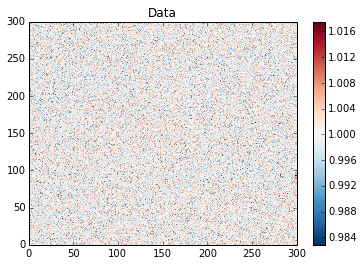

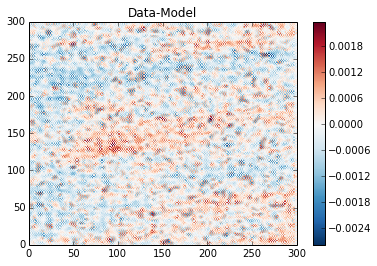

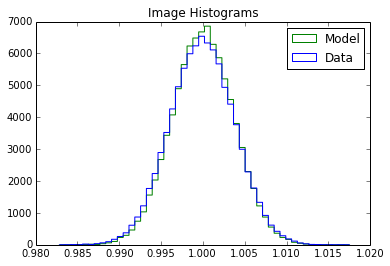

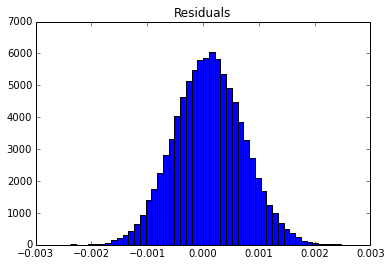

In [36]:
small_img = data_rel_flux_map[500:800,100:400]
print('Cutout Size:', small_img.shape)
runTestAna(small_img)

However, as the cutout gets more and more non-square, there's a strange offset in the pixel sizes that I don't understand. It occurs at the edges of the cutout, and increases in magnitude as the cutout gets more and more non-square:

Cutout Size: (299, 300)
maxiter reached


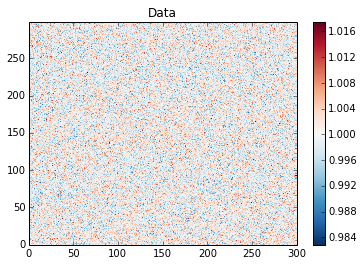

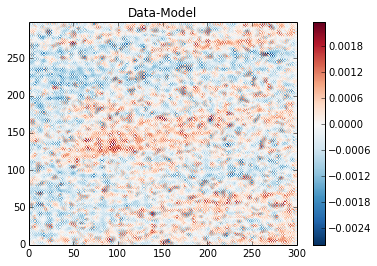

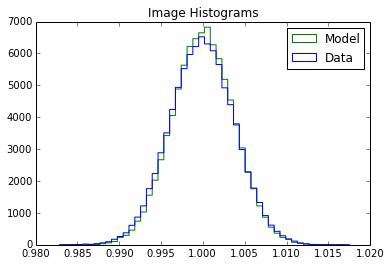

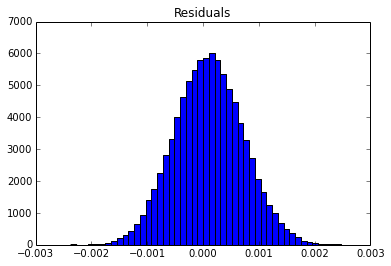

In [37]:
small_img = data_rel_flux_map[500:799,100:400]
print('Cutout Size:', small_img.shape)
X = runTestAna(small_img)

When one dimension is half the size of the other, the model once to make all the fluxes twice as big as they should be...

Cutout Size: (150, 300)
maxiter reached


(<weak_sauce.fit_flat.FlatFitter at 0x1157cb750>,
 array([[ 0.99729028,  1.00058589,  0.99419559, ...,  1.0021993 ,
          0.99721706,  1.01142773],
        [ 1.00677873,  0.99819686,  0.99166767, ...,  1.00209434,
          1.00420137,  1.00443727],
        [ 1.0055644 ,  1.00107656,  1.00087711, ...,  1.00403054,
          1.0031072 ,  0.99920538],
        ..., 
        [ 0.99941847,  0.99748465,  0.99968404, ...,  1.00192719,
          1.00431852,  1.00133062],
        [ 0.99748143,  1.00667635,  0.99956764, ...,  1.00341333,
          1.00310354,  1.00135312],
        [ 0.99771799,  1.00468014,  0.99808329, ...,  0.99910218,
          0.99573541,  1.00310293]]))

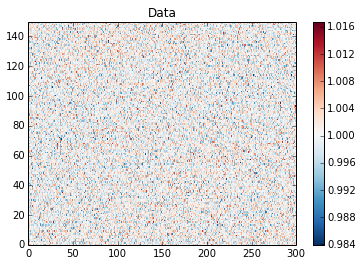

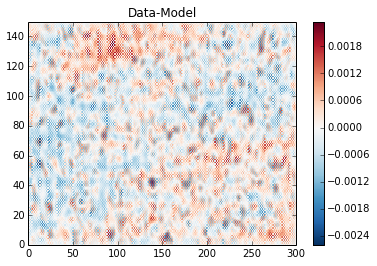

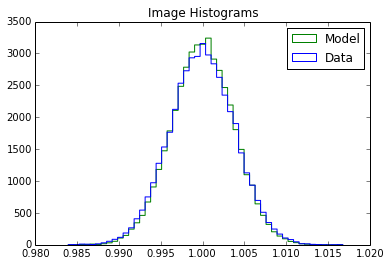

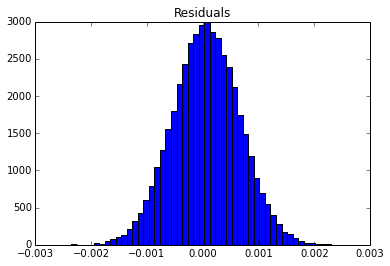

In [40]:
small_img = data_rel_flux_map[500:650,100:400]
print('Cutout Size:', small_img.shape)
runTestAna(small_img)